▶ **Multi-layer Perceptron Classifier (MLPClassifier)** - MLP também pode ser usado para resolver problemas de classificação. Para este exemplo foi utilizado o conjunto de dados Iris com todas as classes possíveis, da plataforma “Kaggle” (https://www.kaggle.com/datasets/uciml/iris)

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPClassifier # Biblioteca para utilização do classificador MLP
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.model_selection import learning_curve # Biblioteca para avaliar um modelo por meio da curva de aprendizagem baseado no tamanho o conjunto de dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, confusion_matrix, classification_report # Biblioteca para avaliação de métricas da execução do classificador
from sklearn import metrics
import seaborn as sns # é uma biblioteca baseada no Matplotlib, que oferece uma interface de alto nível para criação de gráficos estatísticos
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulação de arrays Numpy
from numpy import mean, std
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset

▶ **Carregamento e Organização Inicial do Dataset**

In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("irisMLP.csv")

df = df.replace('Iris-setosa', 0)
df = df.replace('Iris-versicolor', 1)
df = df.replace('Iris-virginica', 2)

X = df.drop('variety', axis=1) # Exclusão da variável que estabelece a classe das entradas
y = df['variety'] # Inclusão da variável que estabelece a classe no vetor de saídas desejadas

/tmp/ipykernel_25470/2842335382.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('Iris-virginica', 2)


▶ **Mapa de correlação entre as variáveis do dataset**

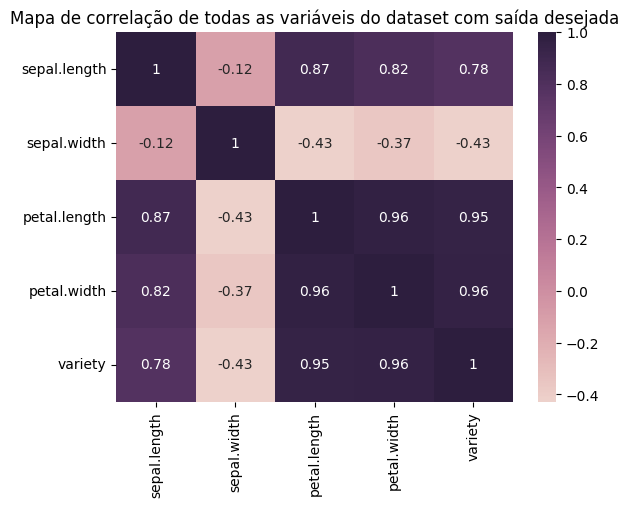

In [5]:
# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset com saída desejada')
ax=ax

▶ **Pré-Processamento dos Dados**

In [6]:
# Padronização de dados (https://sigmoidal.ai/guia-basico-de-pre-processamento-de-dados/ - https://cursos.alura.com.br/forum/topico-sobre-o-standardscaler-184181)
Xcv = X # Guardar o X original para usar nos testes de validação cruzada
scaler = MinMaxScaler().fit(X) # Cria o modelo para o ajuste
X = scaler.transform(X) # Aplica a padronização no dataset de treinamento baseado nos dados de treinamento

# Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste - usa-se este caso em detrimento da validação cruzada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

▶ **Aplicação do MLPClassifier** (
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=10000, epsilon=1e-10, learning_rate='constant', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

print("Número de saídas da RNA: ", mlp.n_outputs_)
print("Função de ativação da camada de saída da RNA: ",mlp.out_activation_)

Número de saídas da RNA:  3
Função de ativação da camada de saída da RNA:  softmax


▶ **Avaliação do Modelo considerando um percentual fixo de amostras para treinamentos e outro para validação**


MÉTRICAS DA CLASSIFICAÇÃO
Acurácia das amostras na classificação não apresentadas no treinamento: 0.9333333333333333
Acurácia balanceada na classificação das amostras não apresentadas no treinamento: 0.9315476190476191
Matriz de confusão das amostras não apresentadas no treinamento:
 [[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]

Relatório de classificação das amostras não apresentadas no treinamento:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
 Iris-virginica       0.88      0.94      0.91        16
Iris-versicolor       0.92      0.86      0.89        14

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



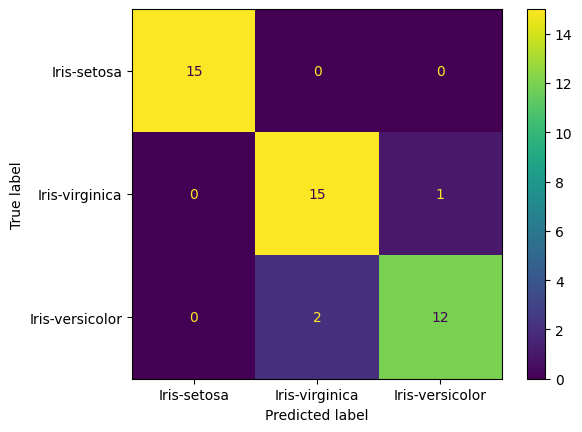

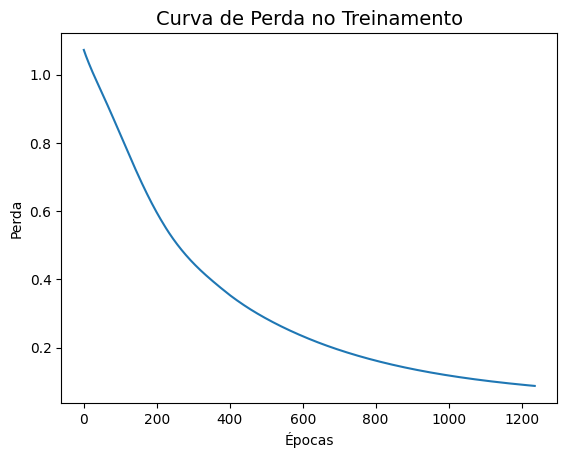


MÉTRICAS DO TREINAMENTO
Melhor loss do treinamento:  0.08817760296853959
Último valor do loss para convergência:  0.08817760296853959
Mean Absolute Error (MAE): 0.06666666666666667
Mean Squared Error (MSE): 0.06666666666666667
Root Mean Squared Error (RMSE): 0.2581988897471611
Mean Absolute Percentage Error (MAPE): 0.044444444444444446
R2:  0.8964723926380368


In [10]:
y_pred = mlp.predict(X_test)

print("\nMÉTRICAS DA CLASSIFICAÇÃO")
# Todas as métricas do sklearn.metrics para classificação https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
print(f"Acurácia das amostras na classificação não apresentadas no treinamento: {accuracy_score(y_test, y_pred)}")
print(f"Acurácia balanceada na classificação das amostras não apresentadas no treinamento: {balanced_accuracy_score(y_test, y_pred)}")
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")

print("")

relatorio = classification_report(y_test, y_pred, target_names=["Iris-setosa", "Iris-virginica", "Iris-versicolor"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'])
cm_display.plot()
plt.show()

print("")

# Plotando o gráfico de erros no processo de treinamento
plt.plot(mlp.loss_curve_)
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()

print("\nMÉTRICAS DO TREINAMENTO")

print("Melhor loss do treinamento: ", mlp.best_loss_) # best_loss_ fornece o melhor valor de perda durante o treinamento
print("Último valor do loss para convergência: ", mlp.loss_) # loss_ fornece o último valor de perda do treinamento
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.root_mean_squared_error(y_test, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(y_test, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.

▶ **Avaliação do modelo considerando o método de validação cruzada utilizando o conjunto completo de dados e Pipeline para organizar a sequência de operações**

In [ ]:
# Criando uma sequência de operações com Pipeline
MLP_pipeline = Pipeline(steps=[
  ("Padronização", StandardScaler()),
  ("MLP", MLPClassifier(hidden_layer_sizes=(30), random_state=12, max_iter=10000, epsilon=1e-10, learning_rate='constant', learning_rate_init=0.0001))
])

# Testando o dataset completo utilizando a validação cruzada
scores_cross_val = cross_val_score(MLP_pipeline, Xcv, y, cv=5)
print("Resultados da validação cruzada do conjunto completo de dados:")
print(scores_cross_val)
print("Média: ", mean(scores_cross_val))
print("Desvio Padrão: ", std(scores_cross_val))

Resultados da validação cruzada do conjunto completo de dados:
[0.94736842 0.89473684 1.         0.89473684 0.94736842 0.84210526
 1.         1.        ]
Média:  0.9407894736842105
Desvio Padrão:  0.05543519587616026


▶ **Sintonizador dos melhores Hiperparâmetros**

In [16]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(10), (20), (30), (50)],
    'max_iter': [2000, 5000],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)
grid.fit(X, y)

/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/will/Desktop/postgrad-ai/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converge

,estimator,MLPClassifier()
,param_grid,"{'activation': ['tanh', 'relu'], 'hidden_layer_sizes': [10, 20, ...], 'learning_rate': ['constant', 'adaptive'], 'max_iter': [2000, 5000], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,hidden_layer_sizes,50


In [17]:
print("Melhores valores dos parâmetros do grid: ", grid.best_params_)
print("Parâmetros mais relevantes para estimar: ", grid.best_estimator_)
print("Melhor acurácia: ", grid.best_score_)

Melhores valores dos parâmetros do grid:  {'activation': 'tanh', 'hidden_layer_sizes': 50, 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
Parâmetros mais relevantes para estimar:  MLPClassifier(activation='tanh', hidden_layer_sizes=50, max_iter=2000)
Melhor acurácia:  0.9733333333333334
